> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time

In [1]:
!pip install matplotlib -U

    100% |████████████████████████████████| 11.5MB 2.7MB/s eta 0:00:01 0% |▏                               | 61kB 5.1MB/s eta 0:00:03    33% |██████████▋                     | 3.8MB 20.2MB/s eta 0:00:01    40% |█████████████                   | 4.7MB 16.0MB/s eta 0:00:01    48% |███████████████▊                | 5.7MB 19.3MB/s eta 0:00:01    64% |████████████████████▊           | 7.5MB 18.3MB/s eta 0:00:01    73% |███████████████████████▍        | 8.4MB 19.2MB/s eta 0:00:01    81% |██████████████████████████      | 9.4MB 20.0MB/s eta 0:00:01    98% |███████████████████████████████▋| 11.4MB 23.5MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 805kB/s eta 0:00:01  3% |█▏                              | 1.9MB 22.1MB/s eta 0:00:03    6% |██                              | 3.0MB 21.9MB/s eta 0:00:03    10% |███▎                            | 5.0MB 19.8MB/s eta 0:00:03    18% |██████                          | 9.2MB 21.4MB/s eta 0:00:02    20% |██████▋                        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [3]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.shape

(10866, 21)

### Data Cleaning (fixing duplicates, drop the unneeded columns)

### there is few thing in the data needs to be fixed:
* fixing the duplicates if there is any
* drop the unneeded columns as ('homepage', 'tagline', 'keywords''tagline', 'overview')
* we have 2 coulmns that give the same data witch is ('id', 'imdb_id')...so we need to drop one of them
* the 'release_date' column needs to be handeld... so we will convert it using Pandas DataTime
* handling the missing values if there is any

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]  #show the duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
df.drop([2090],axis= 0, inplace = True) #droping the duplicates

In [11]:
df.duplicated().sum()  #checking 

0

In [12]:
df.drop(['homepage', 'imdb_id', 'tagline', 'keywords', 'tagline', 'overview'], axis=1, inplace=True)
#droping the unneeded columns

In [13]:
df.info() #checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [14]:
df['release_date'] =pd.to_datetime(df['release_date']) #handling the datatype
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

In [15]:
df.isnull().sum()  # checking if there is any missing values

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
df.dropna(inplace=True) # drop the missing values all over the dataframe

In [17]:
df.isnull().sum() #checking if it is working

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
def replace_zeros(df, column_name):  #function to replace zeros 
     df[column_name].replace(0,df[column_name].mean(), inplace=True)

In [19]:
replace_zeros(df, 'budget')
# df['budget'].replace(0,df['budget'].mean(), inplace=True)  #replace it with the mean value
display(df.query('budget == 0'))  # check if there is any 0 values left 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
# doing the same here in the revenue column
replace_zeros(df, 'revenue')
# df['revenue'].replace(0, df['revenue'].mean(), inplace=True)  #replace it with the mean value
display(df.query('revenue == 0')) # check if there is any 0 values left 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null float64
revenue                 9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 1.3+ MB


In [22]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])  #splitting the 'genres' column to get the type of every movie

<a id='eda'></a>
## Exploratory Data Analysis







### Research Question 1 (most popular genres of all time) 

In [23]:
most_pup_genres = df.groupby(['genres'])['popularity'].sum().sort_values(ascending=False);  #getting the avarage popularity for every genre

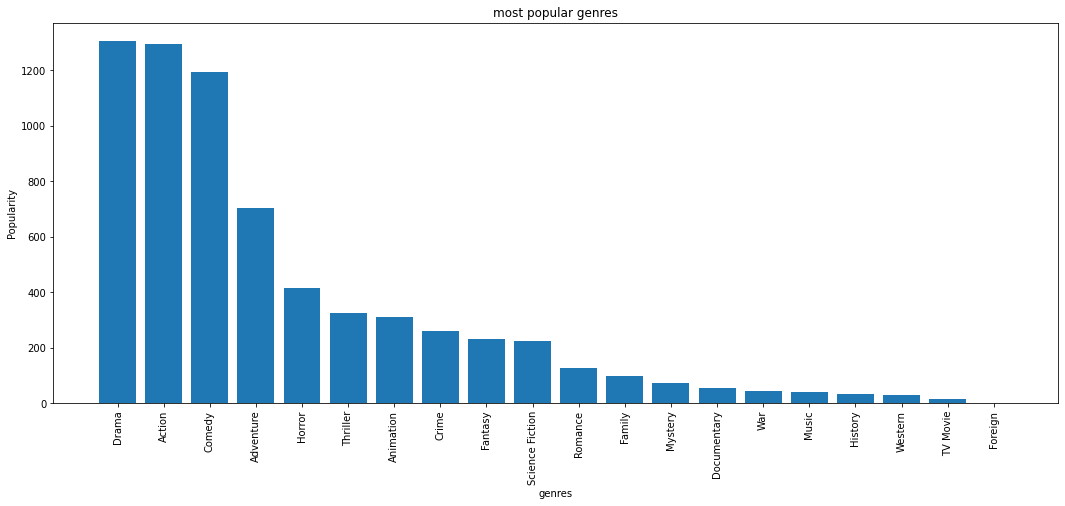

In [24]:
plt.subplots(figsize=(18, 7))
plt.bar(most_pup_genres.index, most_pup_genres)
plt.xticks(rotation=90)
plt.title('most popular genres')
plt.xlabel('genres')
plt.ylabel('Popularity');

this clearly shows that the most popular gener of all time is **Drama** then **action** lastly **comedy**, (foreign, TV movies and western) are the less popular genres lf all time as well 

## Research Question2 (most popular genres year by year)

In [25]:
# Most popular genre from year to year based on the "popularity" scores.
s =df.loc[df.groupby(['release_year'])['popularity'].idxmax()].set_index('release_year')['genres']
s

release_year
1960              Drama
1961          Adventure
1962          Adventure
1963             Action
1964          Adventure
1965          Adventure
1966          Animation
1967             Family
1968    Science Fiction
1969          Adventure
1970          Animation
1971    Science Fiction
1972              Drama
1973          Animation
1974              Drama
1975              Drama
1976              Crime
1977          Adventure
1978              Music
1979             Horror
1980          Adventure
1981          Adventure
1982    Science Fiction
1983          Adventure
1984             Action
1985          Adventure
1986             Horror
1987    Science Fiction
1988             Action
1989          Animation
1990             Action
1991            Romance
1992              Crime
1993            Romance
1994           Thriller
1995              Crime
1996             Action
1997              Drama
1998             Comedy
1999              Drama
2000             Action
200

### Research Question 3  (What kind of properties are associated with movies that have high revenues)

#### the relation between high revenue movies and its genres

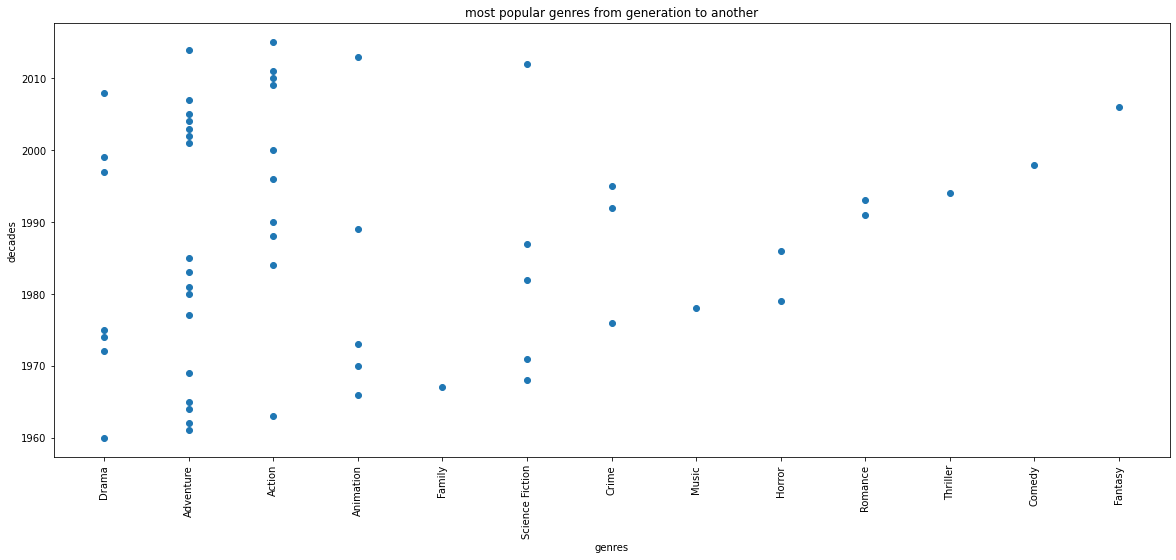

In [26]:
plt.subplots(figsize=(20, 8))
plt.xticks(rotation=90)
plt.scatter(s.values, s.index)
plt.title('most popular genres from generation to another')
plt.xlabel('genres')
plt.ylabel('decades');

i wanted to see waht is the kind of properties are associated with movies that have high revenues ,and this plot shows us that the old decades liked what the new decades like too, and many genres came between (1970-2000) and people liked it as (animation, horor, crime), but the top is **adventure** as it is popular all the time 

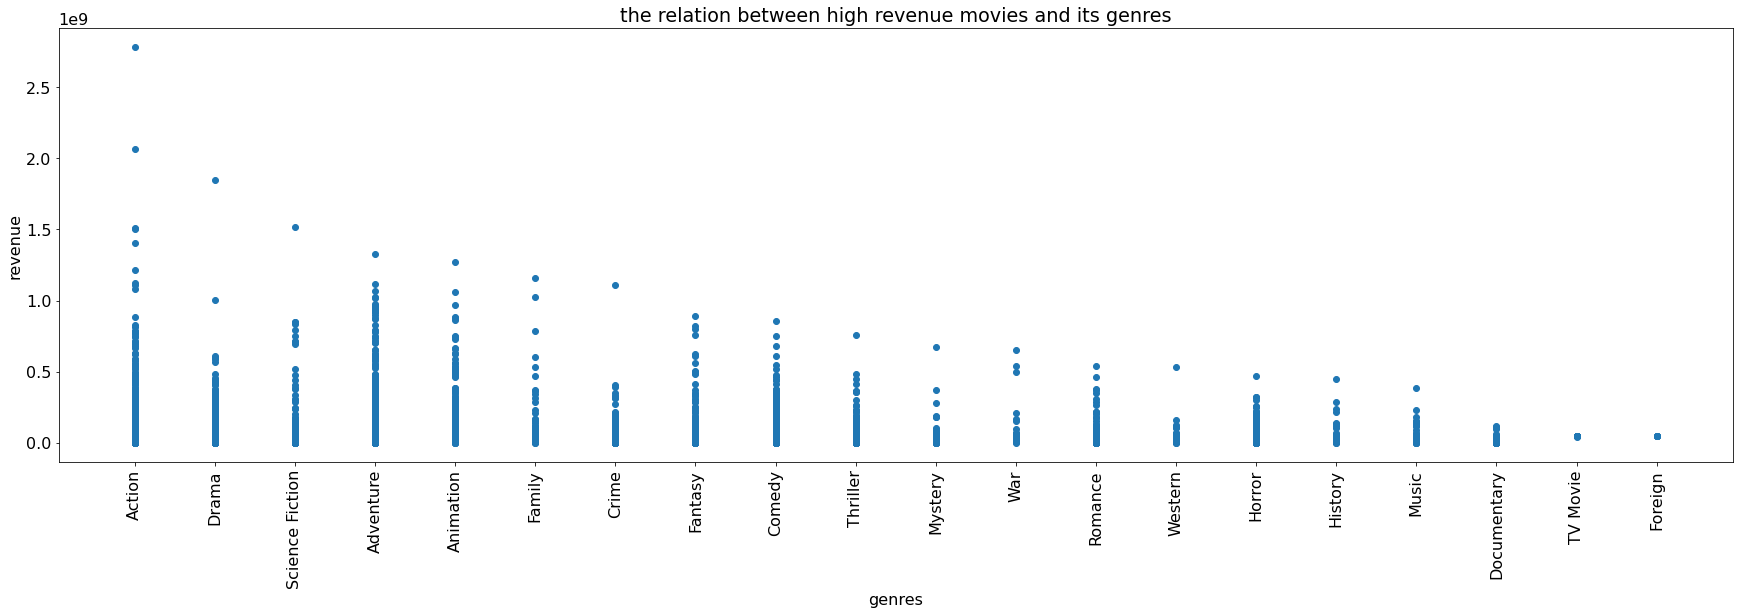

In [27]:
sorted_ = df.sort_values('revenue', ascending=False)
plt.rcParams.update({'font.size': 16})
plt.subplots(figsize=(30, 8))
plt.scatter(sorted_.genres, sorted_.revenue)
plt.xticks(rotation=90)
plt.title('the relation between high revenue movies and its genres')
plt.xlabel('genres')
plt.ylabel('revenue');  

and this plot shows if there is any relation between high revenue movies and its genres, there is more profit in many sections like (action, drama, adventure,animation) than the other as (history, western, TV movie) 

#### the relation between high revenue movies and its budget

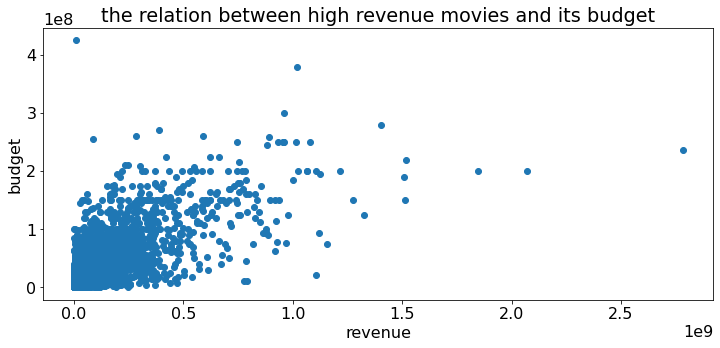

In [28]:
plt.subplots(figsize=(12, 5))
plt.scatter(sorted_.revenue,sorted_.budget)
plt.title('the relation between high revenue movies and its budget')
plt.xlabel('revenue')
plt.ylabel('budget');

in this plot we can see the relation between high revenue movies and the budget that spent on them , it shows that most of the poits are in between **(0.1-1)million** as the budget as we can see at the (budget label), on the other side we see the **revenue** comes from that spent budget as setting between **(0.1-0.5)billion** ,so "it is much money spent, much money in return"

#### the relation between high revenue movies and its runtime

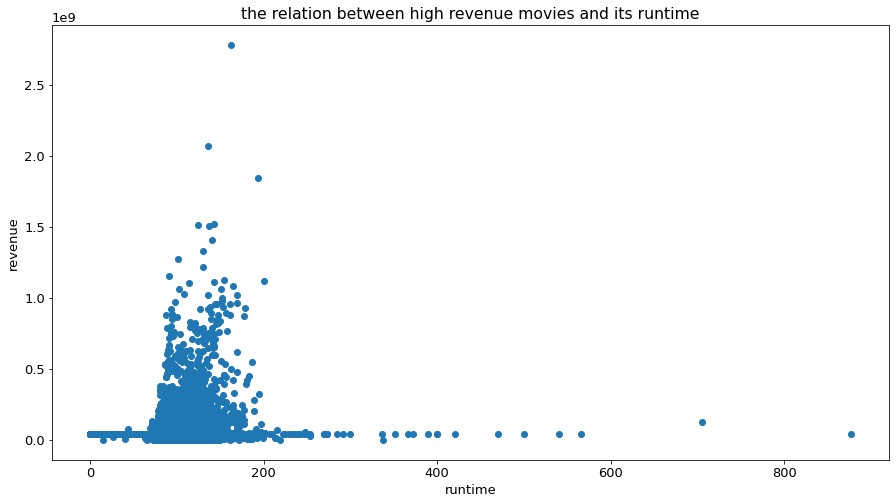

In [29]:
plt.rcParams.update({'font.size': 13})
plt.subplots(figsize=(15, 8))
plt.scatter(df.runtime, df.revenue)
plt.title('the relation between high revenue movies and its runtime')
plt.xlabel('runtime')
plt.ylabel('revenue');

##### here the avarage run time of all of the high revenue movies is between (90-200)min , so it is an important thing to put in mind while producing a movie i guess!

###  Research Question 4 (highest revenue genres)

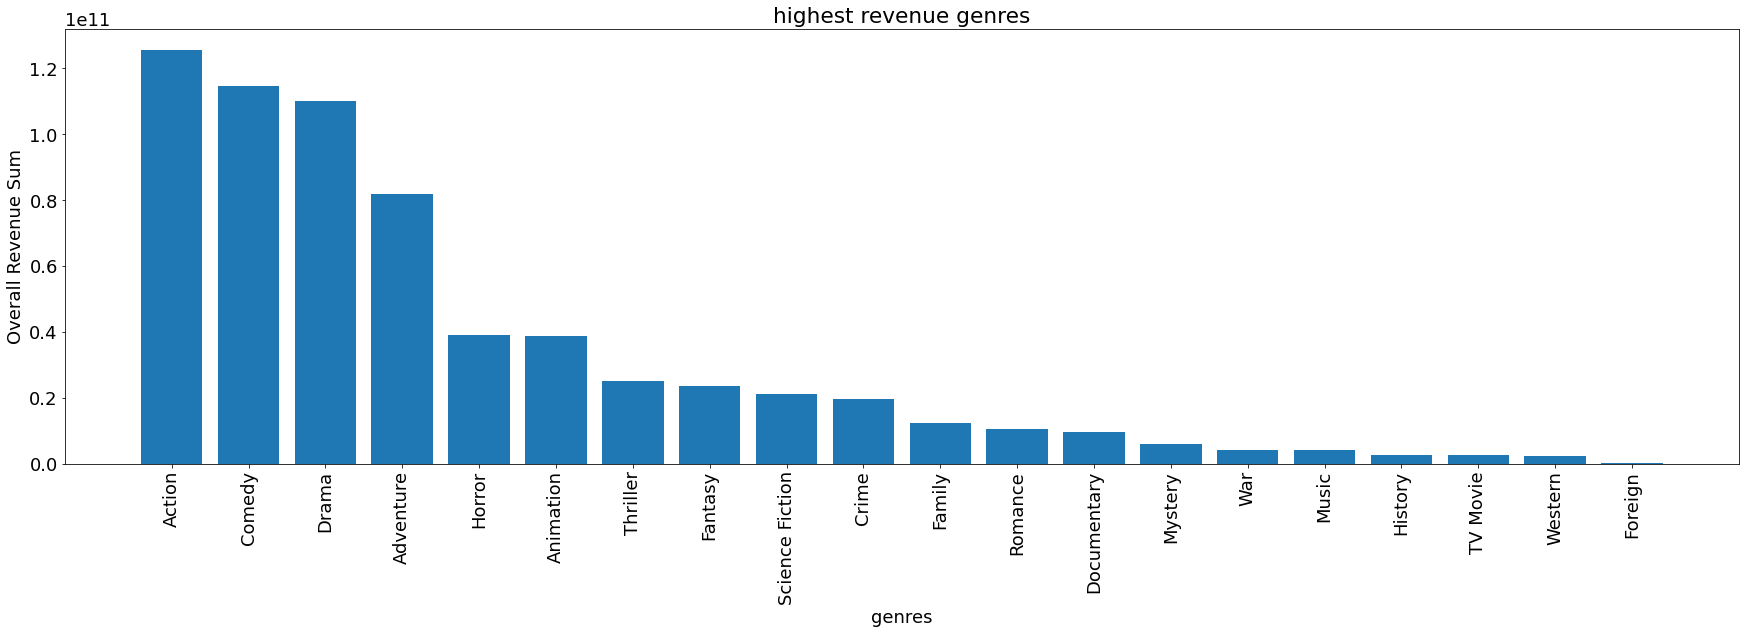

In [30]:
x = df.groupby('genres')['revenue'].sum().sort_values(ascending=False);
plt.rcParams.update({'font.size': 18})
plt.subplots(figsize=(30, 8))
plt.bar(x.index, x.values)
plt.title('highest revenue genres')
plt.xlabel('genres')
plt.xticks(rotation=90)
plt.ylabel('Overall Revenue Sum');

here the data shows clearly the most profit comes from 3 important genres (**action**,**comedy**,**drama**), at the oppesite way the less profit genres is (foreign , western, TV movie)

### Research Question 5 (top 10 movies with highest profit of all time)

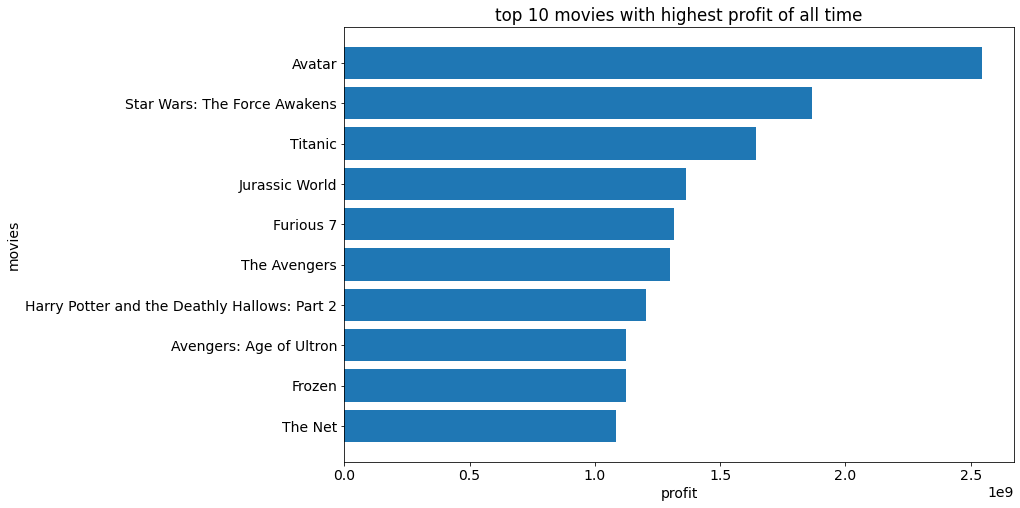

In [31]:
df['profit'] = df.revenue - df.budget
sorted_by_profit = df.sort_values('profit', ascending=False)[:10].reset_index(drop=True)
sorted_by_profit = sorted_by_profit.sort_values('profit', ascending=True)
plt.rcParams.update({'font.size': 14})
plt.subplots(figsize=(12, 8))
plt.title('top 10 movies with highest profit of all time')
plt.xlabel('profit')
plt.ylabel('movies');
# plt.xticks(rotation=90)
plt.barh(sorted_by_profit.original_title, sorted_by_profit.profit);

the TOP10 moveis came with high profit of all time, we can see that the **avatar** movie is the highest with more than **2.5 billion** then **star was** comes with nearly **1.9 billion** ......etc,  this plot is just an answer for a question if it ever comes in mind or some researches

<a id='conclusions'></a>
## Conclusions

###  in the first question,
* i found that the **Drama** genre is the most popular as well as **action** and **comedy** , on the other side the (tv movies, foreign, documentary) the less popular compare to the other genres
### in the second question, 
* the most popular genres from generation to another is **Drama** , **adventure** and **action** , i believe it is True cause  the first question gave us the same output as well as the less popular genres from generation to another
### in the third question,
* I see that there is no much properties are associated with movies that have high revenues, as we can see in the first part of the question...the the relation between high revenue movies and genres is not giving us the most usefull value cause there is too many geners have high revenue like(action , adventure, animation, comedy...etc)
* in the second part the relation between high revenue movies and its budget shows us that the avarage budget is between(100-1000)millon ,it is not a thing that we can relay on because there is so many other movies got (higher revenue) with (lower-higher) budget.
* in the third part of the question we can say that the avarage runtime related to the high revenue is setting between (90-200)min
### in the fourth question,
* I see there is 4 genres are awaay higher than the rest of the genres, it will be very good sugestion for any investor


<ul>
<li><a href="link"> https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split</a></li>
<li><a href="link">https://stackoverflow.com/questions/40389018/dropping-multiple-columns-from-a-data-frame-using-python </a></li>
<li><a href="link"> https://stackoverflow.com/questions/63440494/how-to-sort-scatter-plot-by-decreasing-values-of-y-axis-using-pyplot </a></li>
<li><a href="link"> https://www.geeksforgeeks.org/how-to-increase-the-size-of-scatter-points-in-matplotlib/ </a></li>
 <li><a href="link"> https://stackoverflow.com/questions/4082298/scatter-plot-with-a-huge-amount-of-data </a></li>
</ul>